In [3]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.api import layers, models
from keras.api.optimizers import Adam
from sklearn.model_selection import train_test_split

# seed = 1
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

from keras.api.metrics import AUC, Precision, Recall, F1Score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Sentiment has 3 classes

In [4]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Input"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.2, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.2, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(3, activation='softmax', name="sentiment"))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Recall(), Precision(), AUC(multi_label=True), F1Score(average='weighted')]
)

model.summary()

# Define the input layer
# from keras.api import Input, Model
# from keras.api.layers import BatchNormalization, Dense, Dropout, Flatten


# inputs = Input(shape=(26, 300), name="Input")

# # Build the network architecture
# x = Flatten()(inputs)
# x = Dense(200, activation='relu', name="layer_1")(x)
# x = Dropout(0.2, name="dropout_3")(x)
# x = BatchNormalization(name="batch_normalization_3")(x)
# x = Dense(100, activation='relu', name="layer_2")(x)
# x = Dropout(0.2, name="dropout_4")(x)
# x = BatchNormalization(name="batch_normalization_4")(x)
# outputs = Dense(3, activation='softmax', name="sentiment")(x)

# # Create the model
# model = Model(inputs=inputs, outputs=outputs, name="sentiment_model")

# # Compile the model with the specified optimizer, loss, and metrics
# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy', Recall(), Precision(), AUC(multi_label=True), F1Score(average='weighted')]
# )

# # Display the model summary
# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,803 (6.03 MB)

 Trainable params: 1,581,203 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [5]:
# from keras.api.utils import plot_model
# plot_model(model, to_file="models/sentiment_classification_baseline_model.png",show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [6]:
df_original = pd.read_csv("data/processed/processed_tweets.csv")

In [7]:
df_with_unlabeled = df_original.copy()
df_with_unlabeled = df_with_unlabeled[df_with_unlabeled["Sentiment"].isna()]
df_original = df_original.dropna(subset=["Sentiment"])

df_original["Sentiment"] = df_original["Sentiment"].map({-1: 0, 0: 1, 1: 2})

In [8]:
df_original.head()

,text,Sentiment,Has opinion,Unnamed: 3,cleaned_text,word_vectors,glove_vectors,fasttext_vectors
0,iPad: “Welcome to Apple Intelligence the newes...,0,0.0,NaN,ipad welcome apple intelligence new ipad,"[array([-2.04101562e-01, -1.73828125e-01, -2.2...","[array([ 0.11563 , 0.3842 , -0.16833 , 0...",[[-0.11254 0.040199 0.014042 ... -0.0035...
1,"I believe they call it ""Apple Intelligence"", Sara",1,0.0,NaN,believe call apple intelligence sara,"[array([-0.1640625 , 0.01080322, 0.03320312,...","[array([-2.8593e-01, 3.4309e-01, -3.6802e-01,...",[[-0.016706 0.030139 -0.013468 ... -0.0432...
2,"Unfortunately, there's ""Apple Intelligence"" ad...",0,0.0,NaN,unfortunately apple intelligence add software ...,"[array([ 8.39233398e-04, 2.33154297e-02, -1.9...","[array([-0.12328 , 0.016084 , -0.196 , 0...",[[ 3.3493e-02 1.3523e-02 3.9888e-02 ... -2.1...
3,i did turn it off globally but idk how off it ...,1,0.0,NaN,turn globally idk truly,"[array([-0.06298828, 0.10693359, -0.00549316,...","[array([ 1.9474e-01, 3.8828e-01, 1.3956e-01,...",[[ 0.023676 -0.06791 -0.012704 ... 0.1222...
4,"Uh…yeah. Yes, do that, Apple. I’m fine with th...",0,0.0,NaN,uhyeah yes apple fine leave intelligence,"[array([ 1.15722656e-01, -1.29882812e-01, 6.5...","[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0....",[[ 0. 0. 0. ... 0. ...


In [9]:
df_original["Sentiment"].value_counts()

Sentiment
0    470
1    283
2     47
Name: count, dtype: int64

In [10]:
padded_vectors = np.load("data/processed/padded_glove_vectors.npy")
padded_vectors = padded_vectors[:800]

In [11]:
padded_vectors.shape

(800, 26, 300)

In [13]:
from keras.api.utils import to_categorical


X_train, X_test, y_train, y_test = train_test_split(padded_vectors, df_original["Sentiment"], test_size=0.2, random_state=1, stratify=df_original["Sentiment"])
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [14]:
X_train.shape

(640, 26, 300)

In [15]:
X_train[0]

array([[ 0.18637 , -0.16993 , -0.53933 , ...,  0.024552, -0.42878 ,
         0.37509 ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.36391 ,  0.43771 , -0.20447 , ..., -0.72958 , -0.47891 ,
         0.72956 ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [16]:
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 376
1: 226
2: 38


In [17]:
y_train.shape

(640,)

In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Check if empty
print("X_train is empty:", X_train.size == 0)
print("y_train is empty:", y_train.size == 0)

X_train shape: (640, 26, 300)
y_train shape: (640,)
X_train is empty: False
y_train is empty: False


In [19]:
from keras.api.callbacks import EarlyStopping


callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(x=X_train, y=y_train_encoded, epochs=10, callbacks=callback)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4171 - auc: 0.6064 - f1_score: 0.4477 - loss: 1.3770 - precision: 0.4259 - recall: 0.3378
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7046 - auc: 0.8567 - f1_score: 0.7291 - loss: 0.7165 - precision: 0.7494 - recall: 0.6213
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8065 - auc: 0.9309 - f1_score: 0.8198 - loss: 0.5051 - precision: 0.8321 - recall: 0.7652
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9111 - auc: 0.9683 - f1_score: 0.9128 - loss: 0.3116 - precision: 0.9342 - recall: 0.8826
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9479 - auc: 0.9737 - f1_score: 0.9491 - loss: 0.2104 - precision: 0.9656 - recall: 0.9255
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9592 - auc: 0.9941 - f1_score: 0.9590 - loss: 0.1590 - precision: 0.9650 - recall: 0.9478
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9748 - a

In [ ]:
# model.save("models/sentiment_classification_model_original.keras")

Text(0.5, 0, 'epocha')

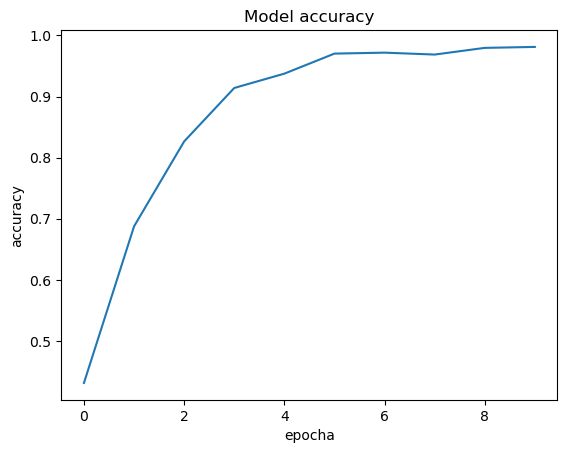

In [19]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

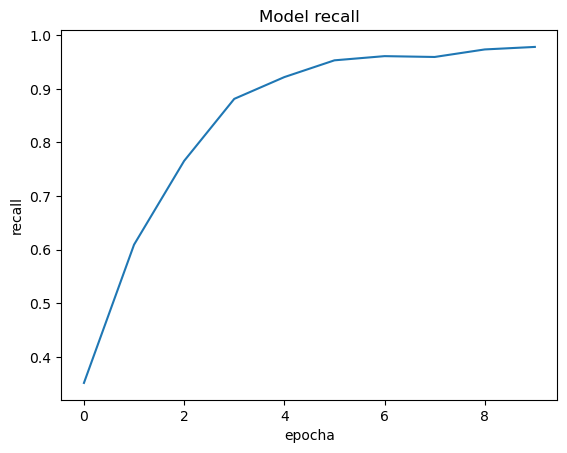

In [20]:
plt.plot(history.history['recall'])
plt.title('Model recall')
plt.ylabel('recall')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

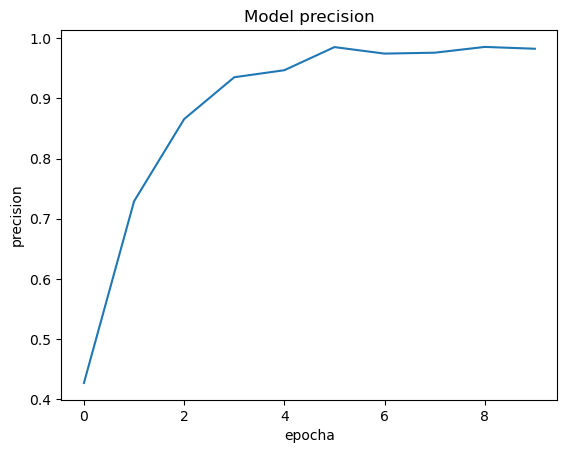

In [21]:
plt.plot(history.history['precision'])
plt.title('Model precision')
plt.ylabel('precision')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

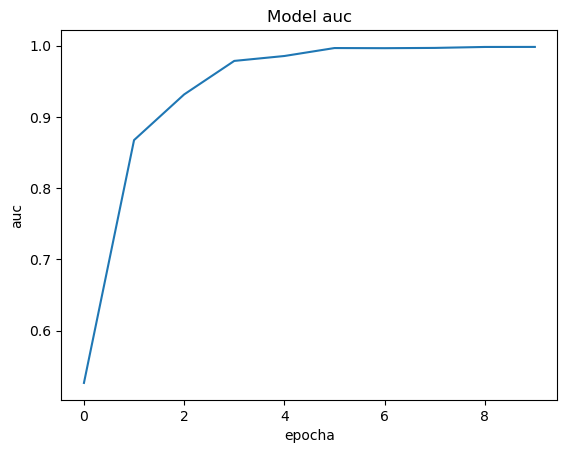

In [22]:
plt.plot(history.history['auc'])
plt.title('Model auc')
plt.ylabel('auc')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

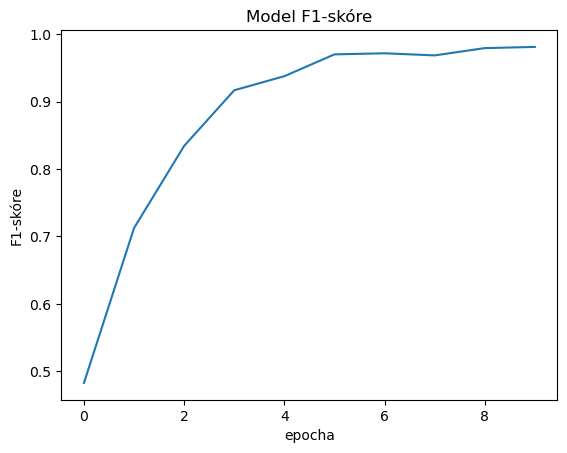

In [23]:
plt.plot(history.history['f1_score'])
plt.title('Model F1-skóre')
plt.ylabel('F1-skóre')
plt.xlabel('epocha')

Text(0.5, 0, 'epocha')

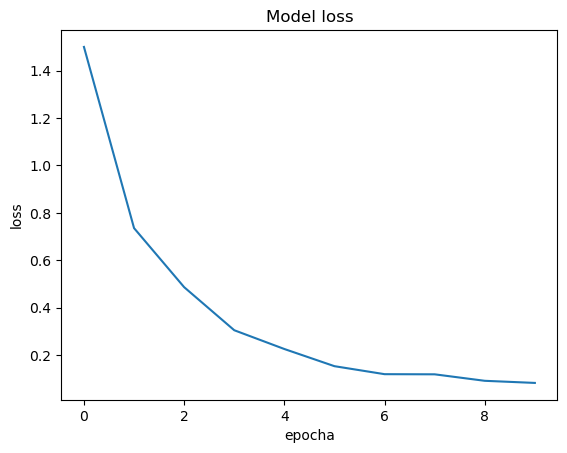

In [24]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epocha')

In [25]:
evaluation = model.evaluate(X_test, y_test_encoded)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6672 - auc: 0.6532 - f1_score: 0.6220 - loss: 1.1208 - precision: 0.6687 - recall: 0.6431  


In [26]:
print(f'Loss: {evaluation[0]}, accuracy: {evaluation[1]}, Recall: {evaluation[2]}, Precision: {evaluation[3]}, AUC: {evaluation[4]}, F1-score: {evaluation[5]}')

Loss: 0.9994867444038391, accuracy: 0.6812499761581421, Recall: 0.6625000238418579, Precision: 0.6928104758262634, AUC: 0.6883969306945801, F1-score: 0.6366007328033447


### Confusion matrix

In [27]:
predictions = model.predict(X_test).argmax(axis=1)
print("Unique values in predictions:", np.unique(predictions))

print("Unique values in y_test:", np.unique(y_test))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Unique values in predictions: [0 1]
Unique values in y_test: [0 1 2]


[[87  7  0]
 [35 22  0]
 [ 9  0  0]]


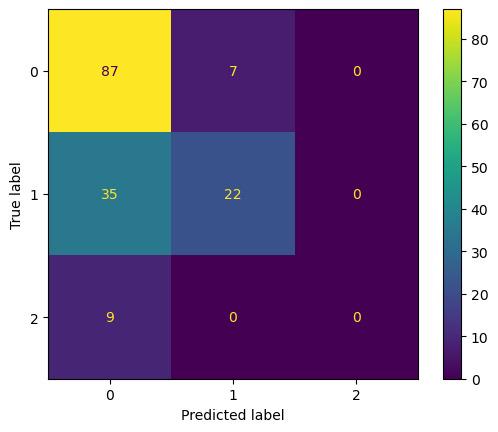

In [28]:
matrix = confusion_matrix(y_test, predictions)
print(matrix)
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [29]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Input"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.2, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.2, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(3, activation='softmax', name="sentiment"))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Recall(), Precision(), AUC(multi_label=True), F1Score(average='weighted')]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,803 (6.03 MB)

 Trainable params: 1,581,203 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [30]:
df_with_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7030 entries, 800 to 7829
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              7030 non-null   object 
 1   Sentiment         0 non-null      float64
 2   Has opinion       0 non-null      float64
 3   Unnamed: 3        0 non-null      float64
 4   cleaned_text      7026 non-null   object 
 5   word_vectors      7030 non-null   object 
 6   glove_vectors     7030 non-null   object 
 7   fasttext_vectors  7030 non-null   object 
dtypes: float64(3), object(5)
memory usage: 494.3+ KB


In [ ]:
unlabeled_padded_vectors = np.load("data/processed/padded_glove_vectors.npy")[801:]
unlabeled_padded_vectors.shape

(7029, 26, 300)

In [ ]:
print("Labeled data shape:", padded_vectors.shape)
print("Unlabeled data shape:", unlabeled_padded_vectors.shape)


Labeled data shape: (800, 26, 300)
Unlabeled data shape: (7029, 26, 300)


In [33]:
distillation_y_train = df_original["Sentiment"].to_numpy()
distillation_y_train = to_categorical(distillation_y_train, 3)

In [ ]:

from scripts.experiments.experiment_1.DataDistillation import DataDistillation

distillation = DataDistillation(
    model,
    (padded_vectors, distillation_y_train),
    unlabeled_padded_vectors, epochs=10, pseudo_batch_size=1000, random_state=1, validation_split=0.2, should_stratify=False, is_multi_class=True, metric_to_evaluate_with='f1_score'
)


In [35]:
distillation.start()

Starting Data Distillation
Training model on labeled training data with shape: (640, 26, 300)
Evaluating model on internal validation set with metric f1_score...
Teacher performance on validation set: 0.6483426690101624

Iteration 1
Teacher predicting on batch with shape: (1000, 26, 300)
Pseudo‑labeled samples in this iteration: 736
Training student on combined data of shape: (1376, 26, 300)
Evaluating model on internal validation set with metric f1_score...
Student performance on validation set: 0.6937985420227051
Student outperformed teacher. Updating teacher model.

Iteration 2
Teacher predicting on batch with shape: (1000, 26, 300)
Pseudo‑labeled samples in this iteration: 870
Training student on combined data of shape: (2246, 26, 300)
Evaluating model on internal validation set with metric f1_score...
Student performance on validation set: 0.6158660650253296
Student did not outperform teacher. Stopping data distillation.
Data distillation process completed.
Final teacher performan

In [36]:
x_val, y_val = distillation.get_validation_set()
y_val = np.argmax(y_val, axis=1)
y_val

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2,
       0, 0, 1, 0, 1, 0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


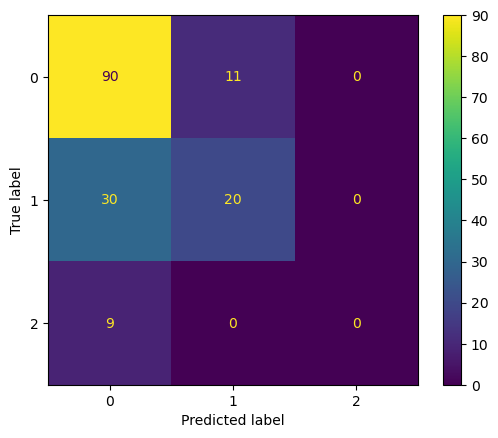

In [37]:
matrix = confusion_matrix(y_val, model.predict(x_val).argmax(axis=1))
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [ ]:
# best_model = distillation.get_model()
# best_model.summary()
# best_model.save("models/experiments/experiment_1/experiment_1_sentiment_classification_model.keras")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,744,211 (18.10 MB)

 Trainable params: 1,581,203 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

 Optimizer params: 3,162,408 (12.06 MB)